# Phase 4: Visualization & Insights

**Objective:** Visualize key business insights using Matplotlib and Seaborn

### 1️⃣ Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

# Create folder for charts
SAVE_DIR = "charts"
os.makedirs(SAVE_DIR, exist_ok=True)

def save_show(fig, filename):
    fig.tight_layout()
    fig.savefig(os.path.join(SAVE_DIR, filename), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)

### 2️⃣ Load CSVs

In [2]:
retail = pd.read_csv("data/retail_cleaned.csv")
support = pd.read_csv("data/support_cleaned.csv")
telco = pd.read_csv("data/telco_cleaned.csv")

print(retail.shape, support.shape, telco.shape)

(805549, 9) (8469, 17) (7032, 22)


### 3️⃣ Retail Dataset Visualizations

#### 3.1 Revenue by Country (Top 10)

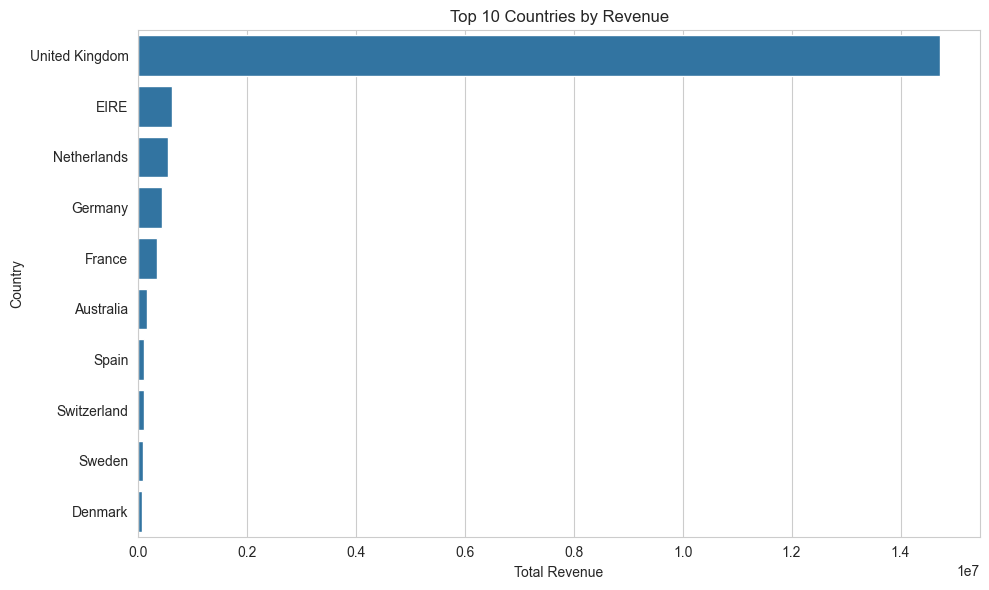

In [3]:
revenue_country = (
    retail.groupby("Country")["TotalAmount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=revenue_country, x="TotalAmount", y="Country", ax=ax)

ax.set_title("Top 10 Countries by Revenue")
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Country")

save_show(fig, "revenue_by_country.png")

#### 3.2 Monthly Revenue Trend

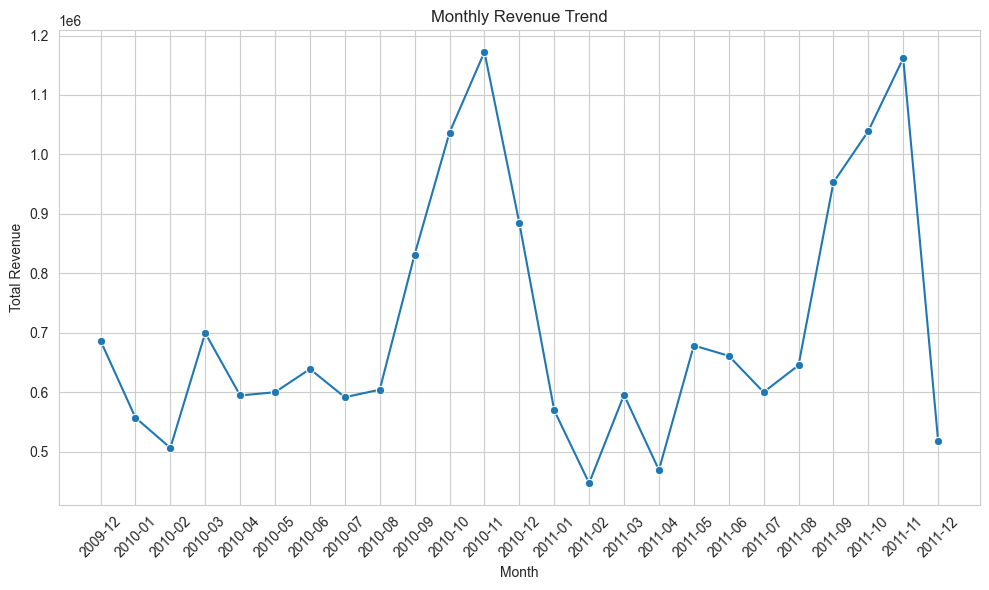

In [4]:
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"])
retail["InvoiceMonth"] = retail["InvoiceDate"].dt.to_period("M").astype(str)

monthly_revenue = (
    retail.groupby("InvoiceMonth")["TotalAmount"]
    .sum()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(
    data=monthly_revenue,
    x="InvoiceMonth",
    y="TotalAmount",
    marker="o",
    ax=ax
)

ax.set_title("Monthly Revenue Trend")
ax.set_xlabel("Month")
ax.set_ylabel("Total Revenue")
ax.tick_params(axis="x", rotation=45)

save_show(fig, "monthly_revenue_trend.png")

#### 3.3 Top 10 Selling Products

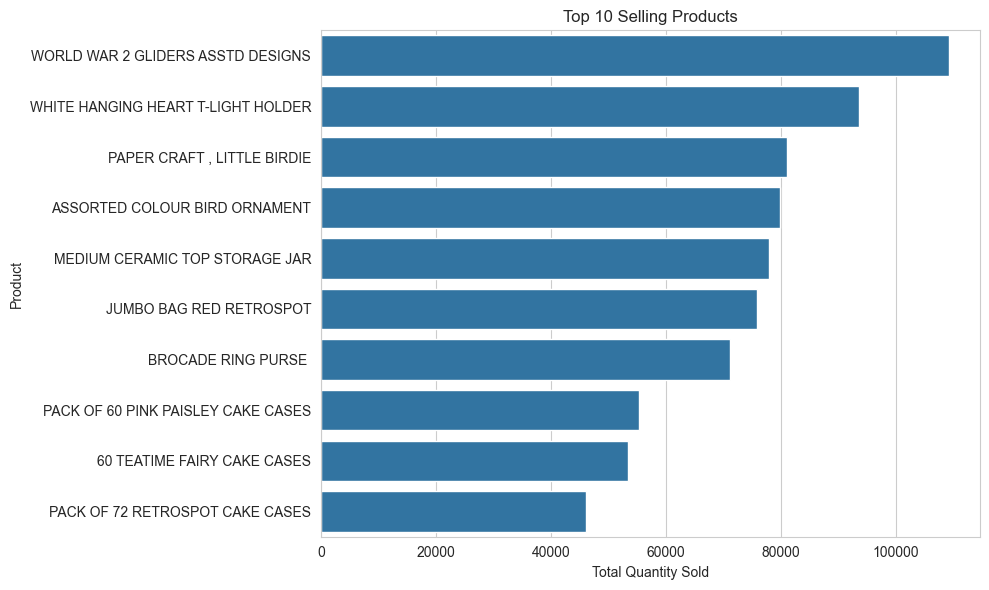

In [5]:
top_products = (
    retail.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=top_products, x="Quantity", y="Description", ax=ax)

ax.set_title("Top 10 Selling Products")
ax.set_xlabel("Total Quantity Sold")
ax.set_ylabel("Product")

save_show(fig, "top_selling_products.png")

### 4️⃣ Customer Support Dataset Visualizations

#### 4.1 Ticket Status Distribution

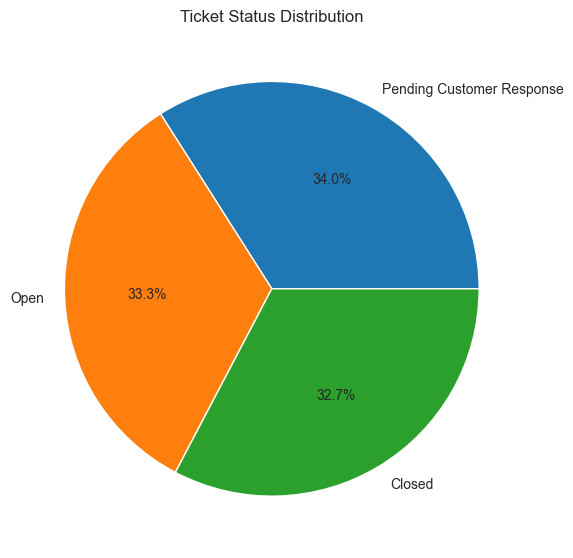

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

support["Ticket Status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    ax=ax
)

ax.set_title("Ticket Status Distribution")
ax.set_ylabel("")

save_show(fig, "ticket_status_distribution.png")

#### 4.2 Ticket Volume by Ticket Status

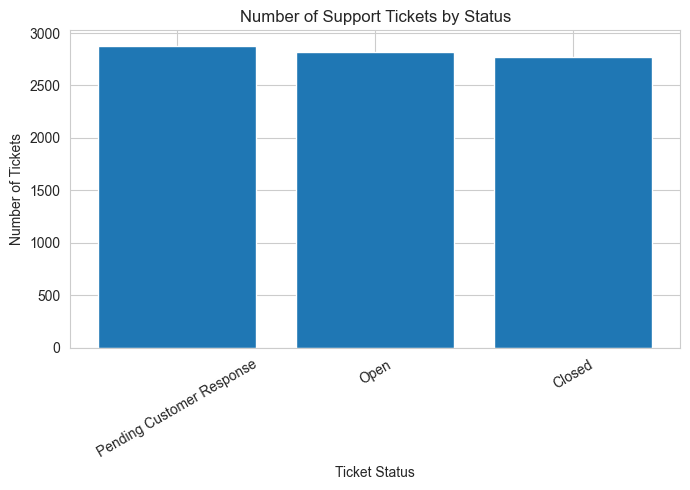

In [7]:
ticket_status_counts = support["Ticket Status"].value_counts()

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(
    ticket_status_counts.index,
    ticket_status_counts.values
)

ax.set_title("Number of Support Tickets by Status")
ax.set_xlabel("Ticket Status")
ax.set_ylabel("Number of Tickets")
ax.tick_params(axis="x", rotation=30)

save_show(fig, "ticketvolume_by_ticketstatus.png")

### 5️⃣ Telecom Dataset Visualizations

#### 5.1 Churn Distribution

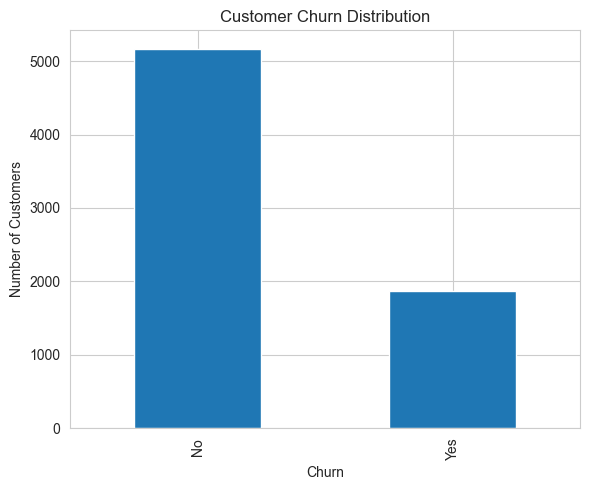

In [8]:
fig, ax = plt.subplots(figsize=(6,5))

telco["Churn"].value_counts().plot(kind="bar", ax=ax)

ax.set_title("Customer Churn Distribution")
ax.set_xlabel("Churn")
ax.set_ylabel("Number of Customers")

save_show(fig, "churn_distribution.png")

#### 5.2 Monthly Charges vs Churn

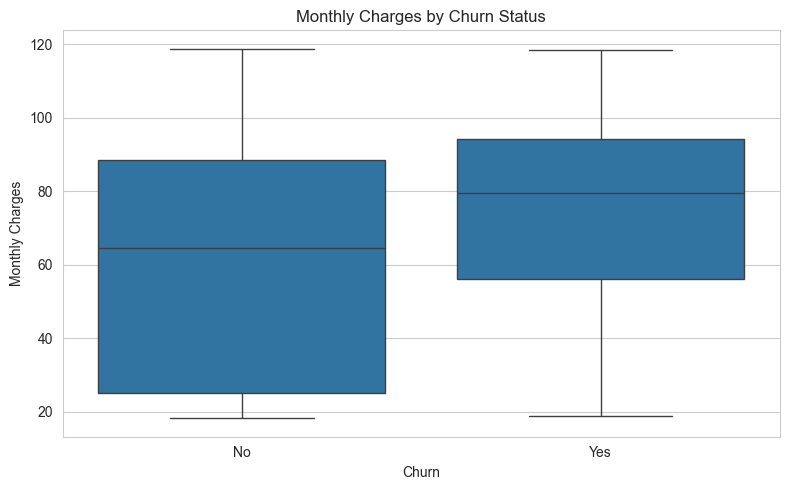

In [9]:
fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=telco, x="Churn", y="MonthlyCharges", ax=ax)

ax.set_title("Monthly Charges by Churn Status")
ax.set_xlabel("Churn")
ax.set_ylabel("Monthly Charges")

save_show(fig, "monthlycharges_vs_churn.png")

#### 5.3 Contract Type vs Churn

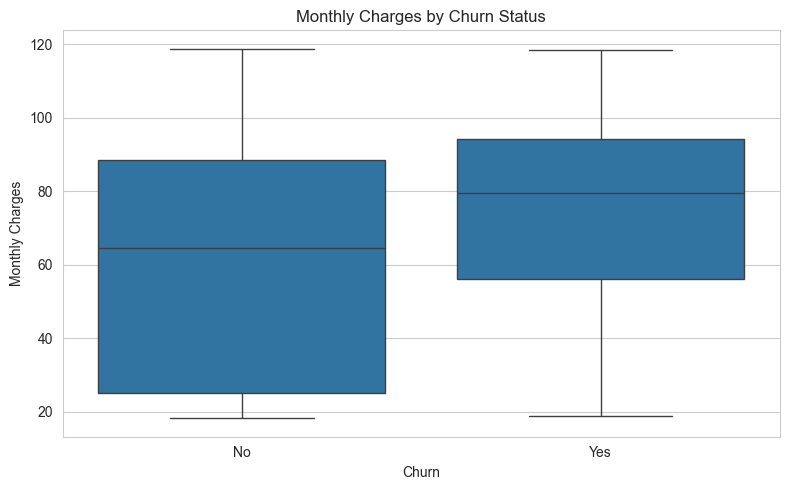

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=telco, x="Churn", y="MonthlyCharges", ax=ax)

ax.set_title("Monthly Charges by Churn Status")
ax.set_xlabel("Churn")
ax.set_ylabel("Monthly Charges")

save_show(fig, "monthlycharges_vs_churn.png")

## Visualization Summary

- Identified top revenue-generating countries and products
- Observed clear monthly revenue trends
- Analyzed customer support resolution efficiency
- Found strong churn patterns based on contract type and pricing
- Visual insights support data-driven business decisions